In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

In [2]:
df = pd.read_csv('C:\\Users\\91242\\Desktop\\imdb_movies.csv')
pairs = {}
for i in range(len(df)):
    actors = df.at[i, 'Actors'].split(', ')
    for actor in actors:
        if pairs.get(actor, None) != None:
            pairs[actor] |= set(df.at[i, 'Genre'].split(','))
        else:
            pairs[actor] = set(df.at[i, 'Genre'].split(','))

pairs = sorted(list(pairs.items()), key=lambda item: item[0])
index = [item[0] for item in pairs]
data = [item[1] for item in pairs]
df1 = pd.DataFrame({'演员': index, '类型': data})

df1

,演员,类型
0,50 Cent,"{Mystery, Action, Crime}"
1,A.C. Peterson,"{Action, Horror}"
2,AJ Michalka,"{Sci-Fi, Thriller, Mystery}"
3,Aamir Khan,"{Family, Romance, Comedy, Biography, Action, M..."
4,Aaron Burns,"{Horror, Thriller, Adventure, Drama}"
...,...,...
2010,Zoë Bell,"{Action, Horror, Thriller}"
2011,Zoë Kravitz,"{Action, Thriller, Sci-Fi, Adventure, Crime, D..."
2012,Émilie Leclerc,"{Adventure, Crime, Biography}"
2013,Ólafur Darri Ólafsson,"{Adventure, Action, Fantasy}"


In [3]:
df1['数量'] = df1['类型'].apply(lambda x: len(x))
df1.sort_values('数量', ascending=False)

,演员,类型,数量
256,Brad Pitt,"{Comedy, History, Action, Thriller, Animation,...",14
954,Johnny Depp,"{Musical, Comedy, Action, Fantasy, Adventure, ...",13
356,Chloë Grace Moretz,"{Comedy, Action, Thriller, Sci-Fi, Adventure, ...",13
732,Hugh Jackman,"{Musical, Comedy, Action, Animation, Sci-Fi, A...",13
97,Amy Adams,"{Comedy, Action, Thriller, Animation, Sci-Fi, ...",12
...,...,...,...
351,Chira Cassel,{Drama},1
1654,"Roman Kolinka,Edith Scob",{Drama},1
1653,"Roman Jossart,Nadia White",{Horror},1
1650,Roger Bart,{Horror},1


In [4]:
result = df1['数量'].max()
result

14

In [10]:
ans = df1[df1['数量']>=result-1]
ans

,演员,类型,数量
256,Brad Pitt,"{Comedy, History, Action, Thriller, Animation,...",14
356,Chloë Grace Moretz,"{Comedy, Action, Thriller, Sci-Fi, Adventure, ...",13
732,Hugh Jackman,"{Musical, Comedy, Action, Animation, Sci-Fi, A...",13
954,Johnny Depp,"{Musical, Comedy, Action, Fantasy, Adventure, ...",13


<Figure size 432x288 with 0 Axes>

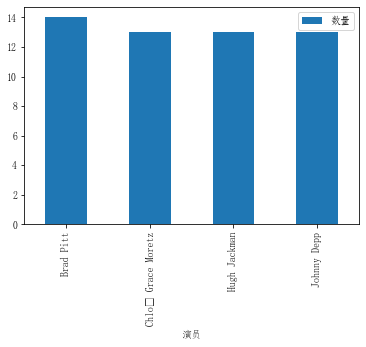

In [13]:
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
plt.figure()
ans.plot(x='演员',y='数量',kind='bar')
plt.show()